## Multiclass extension

In the previous notebooks, most metrics only consider binary classification except $\text{ECE}_{top}$ and $\text{MCE}_{top}$. To handle multi-class classification, the most common way is to convert it to a series of binary classification problems by using 1-vs-rest approach. Alternativly, if the user only care about whether the predicted class of each sample is having the correct predicted probability, the user transform the data to a top-class binary classification problem. In top-class problem, the class 0 probability is the $1-p_{top}$ and class 1 probability is $p_{top}$ and the label is whether true label is equal to the top-class prediction. In `calzone`, user can transform the data using `data_loader.transform_topclass()` function. Most metrics will still works but the interpretation of the metrics will be different.

In [3]:
from calzone.utils import data_loader,reliability_diagram
from calzone.vis import plot_reliability_diagram
from calzone.metrics import CalibrationMetrics

dataset = data_loader('../../../example_data/simulated_welldata.csv')
cal_metrics = CalibrationMetrics(class_to_calculate=1)
### Transform to top-class 
transformed_data = dataset.transform_topclass()

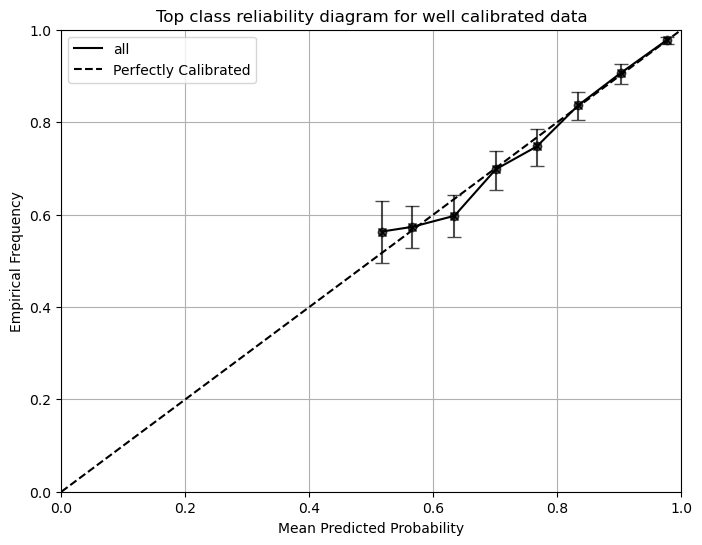

In [4]:
### Now the transformed data become a top-class problem when we specify the class-of-interest to be 1
reliability,confindence,bin_edges,bin_counts = reliability_diagram(transformed_data.labels, transformed_data.probs, num_bins=15,class_to_plot=1)
# Plot the reliability diagram
plot_reliability_diagram(reliability,confindence,bin_counts,error_bar=True,title='Top class reliability diagram for well calibrated data')

In [5]:
cal_metrics.calculate_metrics(transformed_data.labels, transformed_data.probs,metrics='all')

{'SpiegelhalterZ score': 0.37632691618773545,
 'SpiegelhalterZ p-value': 0.7066738713391101,
 'ECE-H topclass': 0.009608653731328977,
 'ECE-H': 0.009608653731329372,
 'MCE-H topclass': 0.03926468843081976,
 'MCE-H': 0.03926468843081932,
 'HL-H score': 6.029652031234071,
 'HL-H p-value': 0.11017646753618837,
 'ECE-C topclass': 0.009458033653818828,
 'ECE-C': 0.009458033653818974,
 'MCE-C topclass': 0.020515047600205505,
 'MCE-C': 0.020515047600205394,
 'HL-C score': 5.0830845954424,
 'HL-C p-value': 0.7486601568004448,
 'COX coef': 0.9990721119864874,
 'COX intercept': -0.009313116424641145,
 'COX coef lowerci': 0.9097229915817346,
 'COX coef upperci': 1.0884212323912401,
 'COX intercept lowerci': -0.1322110153978738,
 'COX intercept upperci': 0.1135847825485915,
 'COX ICI': 0.0012819521292332472,
 'Loess ICI': 0.0038637011857438034}

You can see the top-class ECE is the same as regular ECE.